# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_countries.csv', index_col=[0, 1, 2])

In [3]:
# status == 0 if optimization algorithm terminates successfully
# Looks like all markets can sustain a feasible diet!
(df.status == 0).all()

True

In [4]:
# Most popular (or demanded) foods
only_food = df.drop(['status', 'fun', 'protein_ineq', 'fat_ineq', 'carbs_ineq', 'fiber_ineq'],
                    axis=1)

only_food.sum().sort_values(ascending=False).head(10)

Rice           870.005418
Cowpeas        731.666667
Maize          687.317314
Wheat flour    256.027622
Wheat          198.672103
Bread          172.693666
Sorghum        152.093625
Millet          86.724138
Potatoes        84.730687
Beans           76.045643
dtype: float64

In [5]:
# More than half of all foods under consideration are not demanded at all!
(only_food.sum() == 0).sum() / len(only_food.columns)

0.5595238095238095

In [6]:
# More than 90% of markets do not have fat as an active constraint!
# The corresponding number for protein, carbs and fiber are 20, 30 and 20, resp...
df.iloc[:, -4:].describe(percentiles=[i/10 for i in range(10)])

,protein_ineq,fat_ineq,carbs_ineq,fiber_ineq
count,1457.000000,1457.000000,1457.000000,1457.000000
mean,132.909577,2.043848,666.252616,57.472182
std,290.955807,31.388328,1400.956025,79.246462
min,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
20%,34.102902,0.000000,0.000000,7.075476
30%,61.738703,0.000000,1.359184,7.672212
40%,61.738703,0.000000,261.778774,25.133966
50%,61.738703,0.000000,643.585462,59.500000


## Looking at some specific markets...

In [36]:
# Armavir in Lori, Armenia looks pretty normal...
x = df.loc[('Armenia', 'Lori', 'Armavir')]
x.loc[x != 0]

fun             145.716052
Eggs              0.131893
Pasta             0.233460
Wheat flour       0.175918
protein_ineq     67.810816
Name: (Armenia, Lori, Armavir), dtype: float64

Text(0,0.5,'')

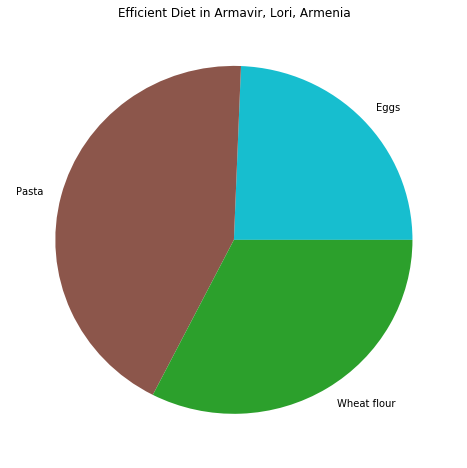

In [37]:
x = x.drop(['status', 'fun', 'protein_ineq', 'fat_ineq', 'carbs_ineq', 'fiber_ineq'])
(x / x.sum()).plot.pie(figsize=[8, 8])
plt.title('Efficient Diet in Armavir, Lori, Armenia')
plt.ylabel('')

In [38]:
# San Vicente in Antioquia, Colombia only sells beans, so the daily diet is 25kg of beans!!
x = df.loc[('Colombia', 'Antioquia', 'San Vicente')]
x.loc[x != 0]

fun             108124.999997
Beans               25.000000
protein_ineq       400.000000
fat_ineq           735.000000
carbs_ineq         400.000000
Name: (Colombia, Antioquia, San Vicente), dtype: float64

Text(0,0.5,'')

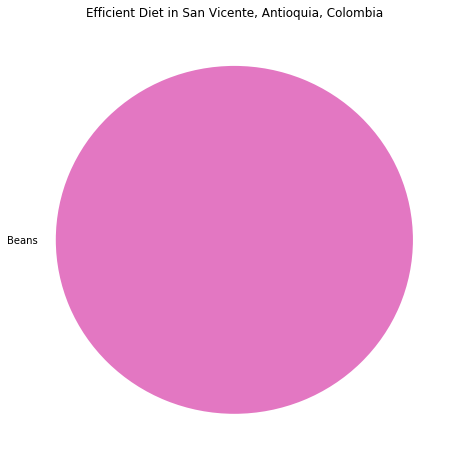

In [39]:
x = x.drop(['status', 'fun', 'protein_ineq', 'fat_ineq', 'carbs_ineq', 'fiber_ineq'])
(x / x.sum()).plot.pie(figsize=[8, 8])
plt.title('Efficient Diet in San Vicente, Antioquia, Colombia')
plt.ylabel('')

In [40]:
# Market has only: onions, potatoes, rice, tomatoes.
# It is interesting that 
x = df.loc[('Myanmar', 'Kachin', 'Sadung')]

Text(0,0.5,'')

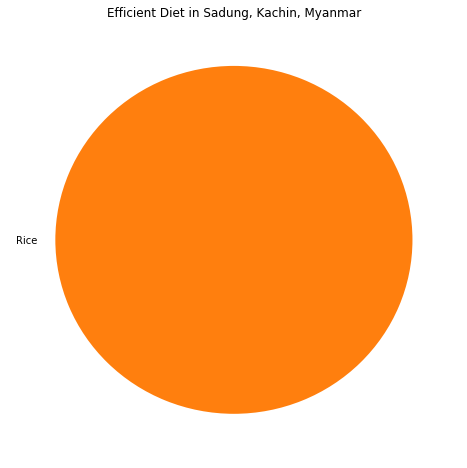

In [41]:
x = x.drop(['status', 'fun', 'protein_ineq', 'fat_ineq', 'carbs_ineq', 'fiber_ineq'])
(x / x.sum()).plot.pie(figsize=[8, 8])
plt.title('Efficient Diet in Sadung, Kachin, Myanmar')
plt.ylabel('')